#**Stock Market Prediction using machine learing.**

For doing the stock market prediction, we are taking 20 years HDFC stocks results from 2000-01-03 to 2020-08-31. 

Stride:



1.   Loading Libraries
2.   Loading dataset
3.   Visualization of data
4.   Preprocessing of data
5.   Train and Test Split
6.   Building Model
7.   Optimization and Hyperparameter tuning
8.   Prediction

This file will contain top 4 strides and will continue the last 4 strides in next file.






## **1. Loading Libraries**

We have loaded the important libraries and we will load other libraries as we need them.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# **2. Loading Data**

We have HDFC stock data and it contains several columns
1. Date
2. Symbol
3. Series
4. Prev Close
5. Open
6. High
7. Low 
8. Last
9. Close
10. VMAP
11. Volume
12. Turnover
13. Trades
14. Deliverable Volume 
15. %Deliverable


In [86]:
data=pd.read_csv('HDFC.csv') #loading the dataset

In [87]:
data.head() #top 5 values of dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [ ]:
data.tail() #bottom 5 values of data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5136,2020-08-25,HDFC,EQ,1829.85,1843.75,1852.4,1817.05,1831.40,1829.60,1834.86,2646159,4.855322e+14,111918.0,1044629.0,0.3948
5137,2020-08-26,HDFC,EQ,1829.60,1837.00,1837.8,1803.60,1810.75,1816.00,1816.89,3187424,5.791196e+14,122481.0,1609579.0,0.5050
5138,2020-08-27,HDFC,EQ,1816.00,1832.00,1883.0,1830.00,1863.50,1864.10,1864.76,8648531,1.612739e+15,256931.0,3892406.0,0.4501
5139,2020-08-28,HDFC,EQ,1864.10,1871.00,1889.0,1862.80,1881.00,1883.25,1879.87,4903981,9.218858e+14,167080.0,2547535.0,0.5195
5140,2020-08-31,HDFC,EQ,1883.25,1898.50,1921.9,1797.55,1825.00,1832.60,1852.71,7604691,1.408930e+15,225537.0,3496941.0,0.4598


In [ ]:
data.shape #shape of data

(5141, 15)

In [ ]:
data.info() #information of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5141 non-null   object 
 1   Symbol              5141 non-null   object 
 2   Series              5141 non-null   object 
 3   Prev Close          5141 non-null   float64
 4   Open                5141 non-null   float64
 5   High                5141 non-null   float64
 6   Low                 5141 non-null   float64
 7   Last                5141 non-null   float64
 8   Close               5141 non-null   float64
 9   VWAP                5141 non-null   float64
 10  Volume              5141 non-null   int64  
 11  Turnover            5141 non-null   float64
 12  Trades              2291 non-null   float64
 13  Deliverable Volume  4632 non-null   float64
 14  %Deliverble         4632 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 602.6

In [ ]:
data.columns #columns of the data

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
data.dtypes #data types of column

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [ ]:
data.isna().sum() #null values in the data

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [ ]:
((data.isnull().sum()/len(data))*100).sort_values(ascending=False) #percentage of null values in the data

Trades                55.436685
%Deliverble            9.900798
Deliverable Volume     9.900798
Turnover               0.000000
Volume                 0.000000
VWAP                   0.000000
Close                  0.000000
Last                   0.000000
Low                    0.000000
High                   0.000000
Open                   0.000000
Prev Close             0.000000
Series                 0.000000
Symbol                 0.000000
Date                   0.000000
dtype: float64

**Visualization of data for seeing null values**

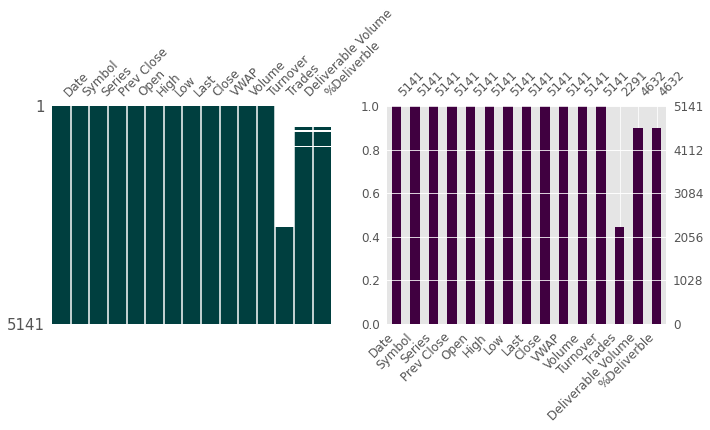

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(data, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(data, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show() 

In [ ]:
data[data.duplicated()] #checking the duplicacy of data 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble


In [ ]:
data.Symbol.unique() #unique value will check the unique element of that particular column

array(['HDFC'], dtype=object)

In [ ]:
data.Series.unique()

array(['EQ'], dtype=object)

##### As we can see HDFC is only element present in Symbol column cause we are using stocks of HDFC only and in Series column we have EQ series only. Hence weare discarding those column. Drop function of pandas will do this work.

In [ ]:
data.drop('Symbol',axis=1,inplace=True)

In [ ]:
data.drop('Series',axis=1,inplace=True)

In [ ]:
data

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5136,2020-08-25,1829.85,1843.75,1852.40,1817.05,1831.40,1829.60,1834.86,2646159,4.855322e+14,111918.0,1044629.0,0.3948
5137,2020-08-26,1829.60,1837.00,1837.80,1803.60,1810.75,1816.00,1816.89,3187424,5.791196e+14,122481.0,1609579.0,0.5050
5138,2020-08-27,1816.00,1832.00,1883.00,1830.00,1863.50,1864.10,1864.76,8648531,1.612739e+15,256931.0,3892406.0,0.4501
5139,2020-08-28,1864.10,1871.00,1889.00,1862.80,1881.00,1883.25,1879.87,4903981,9.218858e+14,167080.0,2547535.0,0.5195


Now we are seeing the description of data that will contain count of all data, mean values, standard deviation, 5 scale values(min, 25% quartile, 50% quartile, 75% quartile and max).
We can use this information for checking any anamolies in the data

In [ ]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5.141000e+03,5.141000e+03,2291.000000,4.632000e+03,4632.000000
mean,1250.235295,1250.866553,1270.373556,1230.175170,1250.370064,1250.538903,1250.162379,1.764469e+06,2.373866e+14,97687.354867,1.292154e+06,0.657592
std,692.794341,692.954979,704.615342,680.761221,692.541757,692.707454,692.428824,2.980988e+06,3.291024e+14,55197.587466,2.584001e+06,0.127174
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,665.800000,665.450000,674.700000,657.400000,665.850000,666.050000,665.370000,2.896580e+05,2.275939e+13,59893.500000,2.560635e+05,0.582775
50%,1099.600000,1100.000000,1117.000000,1077.000000,1098.150000,1099.750000,1099.570000,1.239746e+06,1.611455e+14,86901.000000,9.622980e+05,0.672000
75%,1762.000000,1765.700000,1792.700000,1740.000000,1762.000000,1762.250000,1762.550000,2.623207e+06,3.189503e+14,122501.000000,1.885564e+06,0.744600
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,454758.000000,1.483131e+08,0.989400


After getting some insights of the data we are proceeding further and in this section we will visualizing our data

**Note.- After doing some research we got know that the profit and loss calculation is usually determined by the closing price of a stock.**

So we are going to focus on closing price and preprocess our data based on it.


#**3. Visualization of data**


Visualization of our data will give us insights about the data and
For visualization we are using matplotlib library. 


In the below code we set the index as date cause as we are focussing on closing price in the time series.

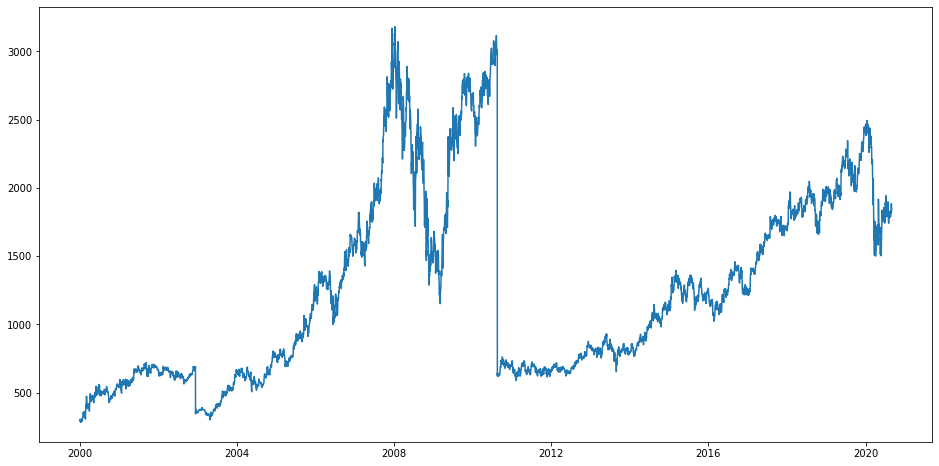

In [89]:
#setting index as date
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

From the above we can see that how our closing price have behaved in several years. 
As we can observe there is huge fall in the year 2011, so it could be because company have faced any huge loss or due splitting up of companies.

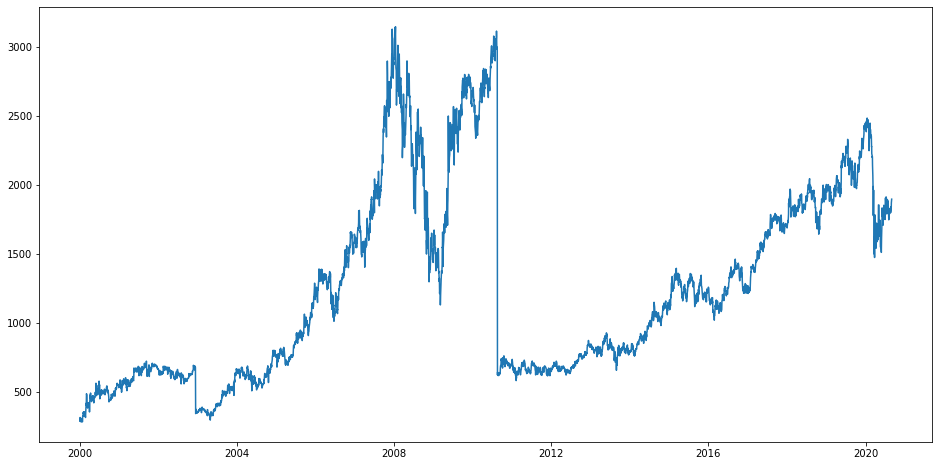

In [90]:
# Now we are visualizing the open price history as well for checking the behavior.
#plot
plt.figure(figsize=(16,8))
plt.plot(data['Open'], label='Open Price history')

##**4. Preprocessing of data**

Now we are making a new dataframe that will contain our date and close (closing price) columns

In [119]:
#sorting
df = data.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = df['Date'][i]
    new_data['Close'][i] = df['Close'][i]

In [120]:
new_data

,Date,Close
0,2000-01-03 00:00:00,293.5
1,2000-01-04 00:00:00,304.05
2,2000-01-05 00:00:00,292.8
3,2000-01-06 00:00:00,296.45
4,2000-01-07 00:00:00,286.55
...,...,...
5136,2020-08-25 00:00:00,1829.6
5137,2020-08-26 00:00:00,1816
5138,2020-08-27 00:00:00,1864.1
5139,2020-08-28 00:00:00,1883.25


In [113]:
#setting index as date
#new_data.index = new_data.Date
#new_data.drop('Date', axis=1, inplace=True)

In [114]:
new_data

,Close
Date,
2000-01-03,293.5
2000-01-04,304.05
2000-01-05,292.8
2000-01-06,296.45
2000-01-07,286.55
...,...
2020-08-25,1829.6
2020-08-26,1816
2020-08-27,1864.1


In [116]:
dataset = new_data.values
dataset

array([[293.5],
       [304.05],
       [292.8],
       ...,
       [1864.1],
       [1883.25],
       [1832.6]], dtype=object)

**Normalizing data**

we are normalizing our data so as such our data will in range of 0 to 1.

In [117]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [118]:
scaled_data

array([[0.00333184],
       [0.00697442],
       [0.00309015],
       ...,
       [0.54560992],
       [0.5522218 ],
       [0.53473397]])

In [121]:
new_data['Scaled_closing_price']=scaled_data

In [122]:
new_data

,Date,Close,Scaled_closing_price
0,2000-01-03 00:00:00,293.5,0.003332
1,2000-01-04 00:00:00,304.05,0.006974
2,2000-01-05 00:00:00,292.8,0.003090
3,2000-01-06 00:00:00,296.45,0.004350
4,2000-01-07 00:00:00,286.55,0.000932
...,...,...,...
5136,2020-08-25 00:00:00,1829.6,0.533698
5137,2020-08-26 00:00:00,1816,0.529003
5138,2020-08-27 00:00:00,1864.1,0.545610
5139,2020-08-28 00:00:00,1883.25,0.552222


We have our data as scaled closing price and closing price. 
So, we will convert this into csv file and save it for building model.

In [123]:
from google.colab import files
new_data.to_csv('HDFC-Preprocessed.csv')         
files.download('HDFC-Preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
new_data

,Close,Scaled_closing_price
Date,,
2000-01-03,293.5,0.003332
2000-01-04,304.05,0.006974
2000-01-05,292.8,0.003090
2000-01-06,296.45,0.004350
2000-01-07,286.55,0.000932
...,...,...
2020-08-25,1829.6,0.533698
2020-08-26,1816,0.529003
2020-08-27,1864.1,0.545610
